In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform( -3, 3 ,size = 100)
X = x.reshape( -1, 1)
y = 0.5* x**2 + x + 2 + np.random.normal(0,1,size = 100)

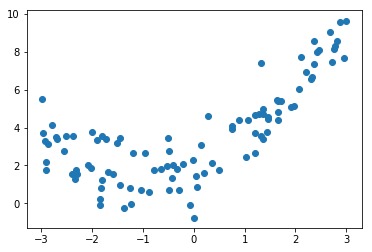

In [4]:
plt.scatter(x,y)

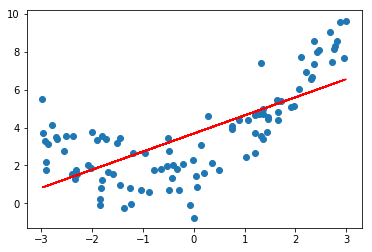

In [6]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X,y)
y_predict = lin.predict(X)
plt.scatter(x,y)
plt.plot(x,y_predict,color ='r')

### 使用均方误差

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predict)

3.0750025765636577

### 使用多项式回归


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [10]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [13]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [14]:
y2_predict = poly2_reg.predict(X)

In [17]:
mean_squared_error(y,y2_predict)

1.0987392142417856

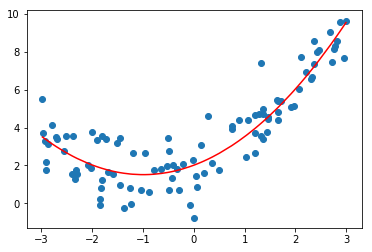

In [19]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color ='r')

In [20]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [21]:
y10_predict = poly10_reg.predict(X)
mean_squared_error(y,y10_predict)

1.050846676376417

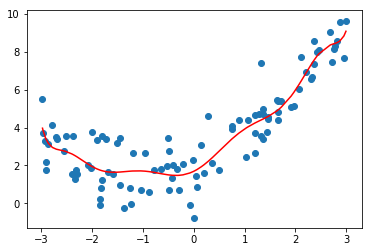

In [22]:
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color ='r')

In [23]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y,y100_predict)

0.6880004678712686

[-3, 3, -1, 10]

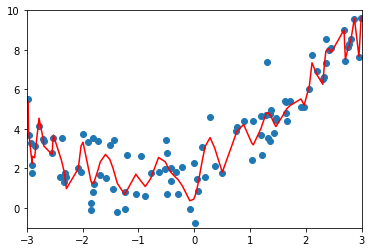

In [25]:
plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color ='r')
plt.axis([-3,3,-1,10])